# **Mathematical tools for Quantitative Finance**
---
<img src="http://www.doc.ic.ac.uk/~afd/images/logo_imperial_college_london.png" align = "left" width=200>
 <br><br><br><br>
 
- Copyright (c) Antoine Jacquier, 2020. All rights reserved

- Author: Antoine Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.7

In [1]:
import numpy as np
import matplotlib.pylab as plt
plt.style.use('dark_background')
import time
import pandas as pd

## Session Overview

- Vectorisation of functions
- Convolutions of functions
- Numerical integration
- Optimisation and root finding
- Application to option pricing

## The importance of vectorisation

### Reminder on variable types

In [2]:
xr = range(5)
xl = list(xr)
xa = np.array(xr)

In [3]:
print(xa, " and ",  2*xa)

[0 1 2 3 4]  and  [0 2 4 6 8]


In [4]:
print(xl, " and ",  2*xl)

[0, 1, 2, 3, 4]  and  [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


In [5]:
print(xr, " and ",  2*xr)

TypeError: unsupported operand type(s) for *: 'int' and 'range'

TAKE-HOME MESSAGE: 
- Use np.array() for computations
- Use lists and ranges for listing or iterations

### Unary functions

Consider a simple function $g(x) = \cos(x)$, that we wish to apply to a vector $(x_i)_{i=1,\ldots, n}$, for $n$ large.
We can either do so by looping over all values of x, or apply the function directly to the vector $x$.
A unary function acts on a single argument, such as np.exp(), np.cos(), np.sqrt()....
They can however be extended to numpy arrays directly, and map the function to the array.

In [6]:
def g(x):
    return np.cos(x)

In [7]:
n = 1000000
xx = np.random.normal(0., 1., n)

## Apply the function cos() to a list
t0 = time.time()
yyLoop = [] ## Creates an empty list
for x in xx:
    yyLoop.append(g(x)) ## Adds new element to the list
dtLoop = time.time() - t0

## Apply the vectorised version of the function cos() to a list
t0 = time.time()
yy1 = np.cos(xx)
dt1 = time.time() - t0

## Same, but directly to the function g()
t0 = time.time()
yy2 = g(xx)
dt2 = time.time() - t0

df = pd.DataFrame([dtLoop, dt1, dt2], index=["Loop", "cos", "g"], columns=["Time (seconds)"])
df.head()

,Time (seconds)
Loop,3.419931
cos,0.022868
g,0.017953


Note: these built-in Numpy functions can be applied to arrays of any sizes:

In [8]:
xxx = normal(0., 1.,  (4, 3))
yyy = np.exp(xxx)
yyy

NameError: name 'normal' is not defined

### Binary functions

A binary function acts on two arguments, such as np.maximum(), np.multiply(), np.power(). 
Again, they are naturally extended to functions on arrays by operating component-wise.

In [ ]:
xx = np.random.normal(0., 1., 2)
yy = np.random.normal(0., 1., 2)
print("xx = ", xx)
print("yy = ", yy)

np.add(xx,yy)

In [ ]:
xx = np.random.normal(0., 1., (2,2))
yy = np.random.normal(0., 1., (1,2))
print("xx = ", xx)
print("yy = ", yy)

print("max = ", np.maximum(xx, yy))

When the two dimensions are not identical, Numpy operates on shape-like-wise dimensions. This is called broadcasting.

### Sequential functions

They apply to arrays directly, for example np.mean(), np.std(), np.sum(), np.max().

In [9]:
xx = np.random.normal(0., 1., 10)
print("Sum over a one-dimensional array: ", np.sum(xx))
xx = np.random.normal(0., 1., (4, 6))
print("Sum over a multi-dimensional-dimensional array: ", np.sum(xx))

Sum over a one-dimensional array:  1.1044497779002849
Sum over a multi-dimensional-dimensional array:  -4.572247203463783


#### What about other Python functions???

In [10]:
def compareRunTimes(aa):
    mm, tt = [], []

    t0 = time.time()
    m = 0.
    for a in aa:
        m+=a
    dt = time.time() - t0
    mm.append(m)
    tt.append(dt)

    t0 = time.time()
    m = sum(aa)
    dt = time.time() - t0
    mm.append(m)
    tt.append(dt)

    t0 = time.time()
    m = np.sum(aa)
    dt = time.time() - t0
    mm.append(m)
    tt.append(dt)
    df = pd.DataFrame(list(zip(mm, tt)), index=["Loop", "Built-in", "Numpy"], columns = ["Sum", "Time"])
    return df

In [11]:
N = 1000000

In [12]:
aa = np.random.rand(N) ## Creates a Numpy array of random numbers
print(type(aa))
df = compareRunTimes(aa)
df.head()

<class 'numpy.ndarray'>


,Sum,Time
Loop,500060.058436,0.406970
Built-in,500060.058436,0.356151
Numpy,500060.058436,0.001992


In [13]:
aa = range(N) ## Creates a range
print(type(aa))
df = compareRunTimes(aa)
df.head()

<class 'range'>


,Sum,Time
Loop,4.999995e+11,0.105703
Built-in,4.999995e+11,0.061836
Numpy,1.783294e+09,0.250916


In [14]:
aa = list(range(N)) ## Creates a  list
print(type(aa))
df = compareRunTimes(aa)
df.head()

<class 'list'>


,Sum,Time
Loop,4.999995e+11,0.085258
Built-in,4.999995e+11,0.045451
Numpy,1.783294e+09,0.104254


**Note:** the same holds for *sum*, *max*, *min*, *mean*...

###  The axis keyword

It allows to apply a function to a slice of a multi-dimensional array.

In [15]:
xx = np.random.normal(0., 1., (4, 1000000))
print("Dimensions of xx: ", xx.shape)

t0 = time.time()
xSum = []
for i in range(xx.shape[0]):
    xSum.append(np.sum(xx[i,:]))
dt = time.time() - t0
print("Sum = ", np.round(xSum, 4), "--- Computation time (seconds): ", dt)

t0 = time.time()
xSum = np.sum(xx, axis=1) 
dt = time.time() - t0
print("Sum = ", np.round(xSum, 4), "--- Computation time (seconds): ", dt)

Dimensions of xx:  (4, 1000000)
Sum =  [1267.9585 1367.836   169.6248  374.9717] --- Computation time (seconds):  0.007981538772583008
Sum =  [1267.9585 1367.836   169.6248  374.9717] --- Computation time (seconds):  0.008652448654174805


Computation times are similar since we only loop over 4 elements. Suppose now the first dimension of xx is large:

In [16]:
xx = np.random.normal(0., 1., (100000, 100))
print("Dimensions of xx: ", xx.shape)

t0 = time.time()
xSum = np.sum(xx, axis=1) 
dt = time.time() - t0
print("Computation time (seconds): ", dt)

## Equivalent:
t0 = time.time()
xSum = []
for i in range(xx.shape[0]):
    xSum.append(np.sum(xx[i,:]))
dt = time.time() - t0
print("Computation time (seconds): ", dt)

Dimensions of xx:  (100000, 100)
Computation time (seconds):  0.011969566345214844
Computation time (seconds):  0.8639917373657227


### Example: Computing pairwise (Euclidean) distances

Consider two two-dimensional arrays $X\in\mathbb{R}^{d_x, n}$ and $Y\in\mathbb{R}^{d_y, n}$. We wish to compute the Euclidean distance
$$
D(X, Y)_{j,k} := \sqrt{\sum_{i=0}^{n}(X_{j,i}-Y_{k,i})^2},
$$
considering the $j$-th row of $X$ and the $k$-th row of $Y$.

The dimensions can be understood as follows for example:

- dx: number of credit lines in Portfolio X
- dy: number of credit lines in Portfolio y
- n: number of (daily) observations for each credit line

In [17]:
n, dx, dy = 100000, 50, 100
X = np.random.normal(0., 1., (dx, n))
Y = np.random.normal(0., 1., (dy, n))

In [18]:
j, k = 1, 1
t0 = time.time()
dist = np.sqrt(np.sum([(x-y)**2 for (x,y) in zip(X[j,:], Y[k,:])]))
dt = time.time() - t0
print("Distance: ", dist, " --- Computation time: ", dx*dy*dt)

t0 = time.time()
dist = np.sqrt(np.sum(((X[j]- Y[k])**2)))
dt = time.time() - t0
print("Distance: ", dist, " --- Computation time: ", dx*dy*dt)

Distance:  447.2029997692414  --- Computation time:  780.1687717437744
Distance:  447.2029997692414  --- Computation time:  9.940862655639648


### Broadcasting

In [19]:
t0 = time.time()
X1 = X.reshape(dx, 1, n)
Y1 = Y.reshape(1, dy, n)
diffs = X1 - Y1
dists = np.sqrt(np.sum(diffs**2, axis=2))
dt = time.time() - t0
print("Distance: ", dists.shape, dists[j,k], " --- Computation time: ", dt)

t0 = time.time()
dists = np.sqrt(np.sum((X[:, np.newaxis] - Y[np.newaxis])**2, axis=2)) ## same as the reshaping above
dt = time.time() - t0
print("Distance: ", dists[j,k], " --- Computation time: ", dt)

Distance:  (50, 100) 447.2029997692414  --- Computation time:  9.604061365127563
Distance:  447.2029997692414  --- Computation time:  16.49520492553711


As soon as the dimension $n$ gets large, the computation time becomes too large.

Optimised broadcasting:

In [20]:
t0 = time.time()
dists = -2 * np.matmul(X, Y.T)
dists +=  np.sum(X**2, axis=1)[:, np.newaxis]
dists += np.sum(Y**2, axis=1)
di = np.sqrt(dists[j,k])
dt = time.time() - t0
print("Distance: ", di, " --- Computation time: ", dt)

Distance:  447.20299976924133  --- Computation time:  0.41804051399230957


### What about more involved functions?

In [21]:
def f(x):
    if x < 0:
        return np.cos(x)
    else:
        return np.exp(-x)

In [22]:
f(xx)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
fVec = np.vectorize(f)
N = 1000000
xx = np.random.normal(0., 1., N)

t0 = time.time()
yyLoop = []
for x in xx:
    yyLoop.append(f(x))
dtLoop = time.time() - t0

t0 = time.time()
yyv = fVec(xx)
dtv = time.time() - t0

t0 = time.time()
yyv2 = [f(x) for x in xx]
dtv2 = time.time() - t0

df = pd.DataFrame([dtLoop, dtv, dtv2], index=["Loop", "Vec", "Iter"], columns=["Time (seconds)"])
df.head()

Note: The vectorize function is provided primarily for convenience, not for performance. The implementation is essentially a for loop.

### Convolutions

In [ ]:
def newFunc(g, x):
    return g(x) ** 2

In [ ]:
print("Calling a numpy function: ", newFunc(np.cos, 2))
print("Calling a function defined previously: ", newFunc(f, 2))

## Numerical integration

In [27]:
from scipy.integrate import quad, simps
import matplotlib.pylab as plt
import numpy as np

In [28]:
def f(x, sig):
    return np.exp(-x*x / (2.*sig*sig)) / (sig*np.sqrt(2.*np.pi))

We wish to integrate both functions on the interval [1, 5]. First Step: always plot the functions to be studied.

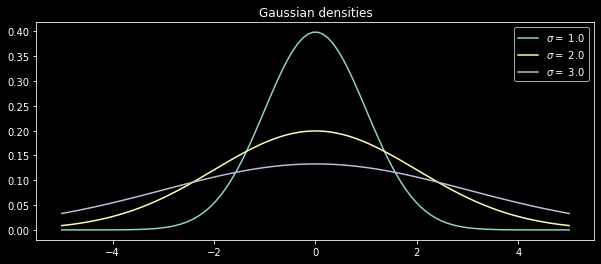

In [29]:
xMin, xMax = -5., 5.
sigma = [1., 2., 3.]
xx = np.linspace(xMin, xMax, 100)
plt.figure(figsize=(10,4))
ff = []
for s in sigma:
    ff.append([f(x,s) for x in xx])
    plt.plot(xx, ff[-1], label='$\sigma=$ %.1f' %s)
plt.title("Gaussian densities")
plt.legend(loc='best')
plt.show()

Numerical integration documentation: 
- Simpson's rule: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html
- Adaptive quadrature: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

In [30]:
print('Numerical integration for f:')
for i in range(len(sigma)):
    print('sigma=', sigma[i])
    qf = quad(f, xMin, xMax, args=(sigma[i],))
    qs = simps(ff[i], xx)
    print("Quadrature: ", qf)
    print("Simpson: ", qs)
    print("***************************")

Numerical integration for f:
sigma= 1.0
Quadrature:  (0.9999994266968565, 8.668320261908254e-10)
Simpson:  0.9999994303377673
***************************
sigma= 2.0
Quadrature:  (0.9875806693484478, 8.131326825877965e-09)
Simpson:  0.987581685757187
***************************
sigma= 3.0
Quadrature:  (0.9044192954543706, 1.0752880637243533e-13)
Simpson:  0.9044198563638324
***************************


## Optimisation and root-finding

We investigate some of the importants routines within the scipy.optimize package https://docs.scipy.org/doc/scipy/reference/optimize.html

### Root finding

We are interested in finding the (unique?) solution to the equation
\begin{equation*}
f(x) = 0,
\end{equation*}
over some given interval.


In [31]:
from scipy.optimize import fsolve, root, minimize

def f(x):
    return x*x-1.
    
fsolve(f, x0=1.)

array([1.])

Note that this is a local solver, that needs a starting estimate. It also works in the multidimensional setting:

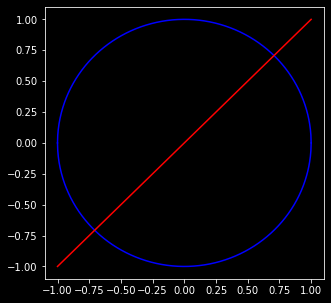

In [35]:
def f(x):
    return [x[0]**2+x[1]**2-1., x[0]-x[1]]

x0 = [.2, .4]
aa = np.linspace(-1.,1.,1000)
cirP = np.sqrt(1.-aa**2)
cirM = -np.sqrt(1.-aa**2)
lin = [a for a in aa]

plt.figure(figsize=(5,5))
plt.plot(aa,cirP, 'b')
plt.plot(aa,cirM, 'b')
plt.plot(aa,lin,'r')
plt.show()

In [37]:
print(fsolve(f, x0))

[0.70710678 0.70710678]


In [38]:
print(root(f, x0))

    fjac: array([[ 0.72956803,  0.68390825],
       [-0.68390825,  0.72956803]])
     fun: array([2.22044605e-16, 0.00000000e+00])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.95595807e-12,  3.70837570e-12])
       r: array([ 1.46218444,  0.60134565, -1.93438472])
  status: 1
 success: True
       x: array([0.70710678, 0.70710678])


### Optimisation

**Remark:** Root-finding problems can be recast as minimisation problem. For example, solving $f(x) = c$ can be tackled as
\begin{equation*}
\min_{x} \left[f(x)-c\right]^2.
\end{equation*}

When solving an optimisation problem of the form $\min_{x}g(x)$, we first need to consider the following question:
- Is the objective function $g$ convex?
- Is the objective function $g$ smooth, i.e. is its gradient defined everywhere?
- Are there constraints?

#### One-dimensional optimisation

In [39]:
from scipy.optimize import minimize_scalar
def f(x):
    return x*x-1.
def f2(x):
    return f(x)**2
result = minimize_scalar(f2)
print(result)
print("*******************")
result2 = minimize_scalar(f2, bounds=(-4., 0.), method='bounded')
print(result2)

     fun: 0.0
    nfev: 12
     nit: 8
 success: True
       x: 1.0
*******************
     fun: 8.127928729108361e-13
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: -1.0000004507750289


## Pricing Options in the Black-Scholes model

### Option Pricing

A European Call option on some stock $(S_t)_{t\geq 0}$ gives the holder the right (but not the obligation) to exchange the stock at a future time $T$ for a given price $K$.
The initial value of such an option is therefore (by no-arbitrage arguments):
\begin{equation*}
C(S_0, K, T) = \mathbb{E}\left[\max(S_T-K, 0)\right] = 
(S_{T}-K)\mathbb{1}_{S_T\geq K} + 0\mathbb{1}_{S_T< K}.
\end{equation*}
*Note: We consider no interest rate nor dividends here*.

### A quick and dirty introduction to Black-Scholes

The Black–Scholes model is one of the cornerstones of mathematical finance.
It assumes that the underlying stock price has the following dynamics:
$$
S_t
 = S_0\exp\left\{-\frac{\sigma^2 t}{2} + \sigma W_t\right\}
 = S_0\exp\left\{-\frac{\sigma^2 t}{2} + \sigma\widetilde{n}\sqrt{t}\right\} \text{ (in distribution)},
$$
for each $t\geq 0$, for some constant $\sigma>0$, and where $\widetilde{n}$ is a standard Gaussian random variable.
Here $(W_t)_{t\geq 0}$ is a standard Brownian motion, and satisfies:
- $W_0 = 0$ almost surely;
- for any $0\leq s \leq t$, $W_t - W_s$ is a Gausssian random variable with mean zero and variance $t-s$;
- non-overlapping increments are independent.

The value of a European Call option on $(S_t)_{t\geq 0}$ in the Black-Scholes model is given, at time $t\in [0,T]$, by
$$
C^{\mathrm{BS}}(S_t, t, K, T:\sigma) := \mathbb{E}\left[\max(S_{T} - K, 0)\right]
 = S_t\left(\mathcal{N}(d_{+}) - \mathrm{e}^{k}\mathcal{N}(d_{-})\right),
$$
where
$$
d_{\pm} = \frac{-k}{\sigma\sqrt{T - t}} \pm\frac{\sigma\sqrt{T-t}}{2}
$$
and
- $k := \log\left(K / S_t\right)$ is called the log moneyness;
- $\mathcal{N}(\cdot)$ is the cumulative distribution function of the standard normal distribution,
- $T - t$ is the time to maturity;
- $S_t$ is the spot price of the underlying asset;
- $K$ is the strike price;
- $\sigma$ is the volatility  of returns of the underlying asset.


### Pricing via the closed-form formula

In [40]:
from scipy.stats import norm

def BSCall(S0, K, sigma, t, T):
    '''
    #Inputs:
    S0: initial stock price
    K: strike
    sigma: instantaneous volatility
    T: time to maturity
    #Output:
    Black-Scholes Call price
    '''
    tau = T - t
    sigmtau = sigma*np.sqrt(tau)
    k = np.log(K/S0)
    dp = -k / sigmtau + 0.5*sigmtau
    dm = dp - sigmtau
    return S0*(norm.cdf(dp) - np.exp(k)*norm.cdf(dm))

In [41]:
S0, K, sigma, t, T = 100., 100., 0.2, 0., 1.
print("Black-Scholes Call option price:", BSCall(S0,K,sigma,t,T))

Black-Scholes Call option price: 7.965567455405798


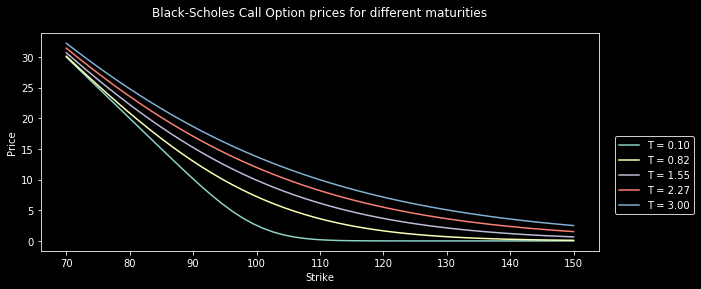

In [42]:
TT = np.linspace(0.1,3.,5)
strikes = np.linspace(70., 150, 50)
plt.figure(figsize=(10, 4))

for T in TT:
    plt.plot(strikes, [BSCall(S0,K,sigma,t,T) for K in strikes], label='T = %.2f' %T)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.55),fancybox=True, shadow=True, ncol=1)
plt.title('Black-Scholes Call Option prices for different maturities',y=1.05,fontsize=12)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.show()

*Note:  one could also vectorise the Black-Scholes function first.*

### Pricing by integration

Recall that under the Black-Scholes model, the stock price satisfies at maturity $T$,
\begin{equation*}
S_T
 = S_0\exp\left\{-\frac{\sigma^2 T}{2} + \sigma\widetilde{n}\sqrt{T}\right\},
\end{equation*}
where $\widetilde{n}$ is a Gaussian random variable. Therefore, for any function $f:\mathbb{R}_+\to\mathbb{R}$, we can write
\begin{equation*}
\mathbb{E}\left[f(S_T)\right] = 
\mathbb{E}\left[f\left(S_0\exp\left\{-\frac{\sigma^2 T}{2} + \sigma\widetilde{n}\sqrt{T}\right\}\right)\right] =
\int_{\mathbb{R}}f\left(S_0\exp\left\{-\frac{\sigma^2 T}{2} + \sigma x\sqrt{T}\right\}\right)\phi(x) \mathrm{d} x,
\end{equation*}
where
\begin{equation*}
\phi(x) := \frac{1}{\sqrt{2\pi}}\exp\left\{-\frac{x^2}{2}\right\}
\end{equation*}
is the Gaussian density.

**Exercise:** Check the Black-Scholes price by integration. Hints / advice:
- Plot the integrand as a function of $x$ to determine how to truncate the real line (integration domain);
- Use different numerical integration packages.

### Pricing by simulation

#### SImulating Brownian motion

A Brownian motion $(W_t)_{t\geq 0}$ has the following properties:
\begin{itemize}
\item(i) $W_0 = 0$;
\item(ii) For any $t \geq 0$, $\delta \in (0,t)$, $W_{t+\delta} - W_{t}$ is distributed as a Gaussian with mean zero and variance $\delta$;
\item(iii) For any $0\leq s < t \leq u < v$, 
the increments $(W_v - W_u)$ and $(W_t-W_s)$ are independent.
\end{itemize}
Therefore, on the interval $[0,T]$, create a partition $0=t_0< \cdots < t_i < t_{i+1}<\cdots<t_n=T$, so that
$$
W_T = W_{t_n} = \left(W_{t_n} - W_{t_{n-1}}\right) + \cdots + \left(W_{t_1} - W_{t_{0}}\right).
$$
Using Property (ii) above, this is equal in distribution to
$$
W_T = W_{t_n} = \sqrt{t_n-t_{n-1}}\ \widetilde{N}_{n-1} + \cdots +\sqrt{t_{1}-t_{0}}\ \widetilde{N}_{0},
$$
where the sequence $(\widetilde{N}_{i})_{i}$ is iid centered Gaussian with unit variance.


In [43]:
T, n, nbPaths = 1., 1000, 50
tt = np.linspace(0., T, n) ## Equidistant discretisation grid
dt = tt[1] - tt[0]

Computation time:  0.33964085578918457  seconds


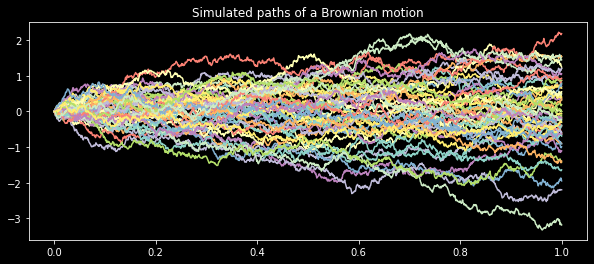

In [44]:
t0 = time.time()
ww = np.zeros((n, nbPaths)) ## The Brownian motion starts at zero
N = np.random.normal(0.,1., (nbPaths, n-1))
for path in range(nbPaths):
    for (i,t) in enumerate(tt[:-1]):
        #ww[i+1,path] = ww[i,path] + np.sqrt(dt) * np.random.normal(0.,1.)
        ww[i+1,path] = ww[i,path] + np.sqrt(dt) * N[path,i]
t1 = time.time()-t0
print("Computation time: ", t1, " seconds")

plt.figure(figsize=(10,4))
for path in range(nbPaths):
    plt.plot(tt, ww[:, path])
plt.title("Simulated paths of a Brownian motion")
plt.show()

#### Using numpy vectorisation

Computation time:  0.00598454475402832  seconds


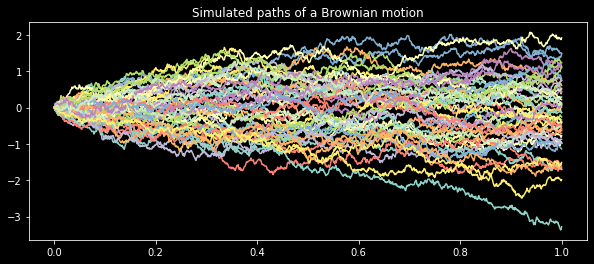

In [45]:
t0 = time.time()
nn = np.random.normal(0., 1., (n-1, nbPaths)) * np.sqrt(dt)
ww = np.zeros((n, nbPaths))
ww[1:,:] = np.cumsum(nn, axis=0)
t1 = time.time()-t0
print("Computation time: ", t1, " seconds")
plt.figure(figsize=(10,4))
for path in range(nbPaths):
    plt.plot(tt, ww[:, path])
plt.title("Simulated paths of a Brownian motion")
plt.show()

### Computing the implied volatility

Given a strike $K$, a maturity $T$ and an underlying stock $S$, we can observe the European Call price $C^{\mathrm{observed}}(S_0, K, T)$.
The **implied volatility** is defined as the unique non-negative number $\sigma$ solution to the equation
\begin{equation*}
C^{\mathrm{observed}}(S_0, K, T) = C^{\mathrm{BS}}(S_0, K, T; \sigma).
\end{equation*}
The implied volatility is a kew concept in trading, and options are usually quoted in terms of their implied volatilities rather than in option prices.

## Potentially useful packages

List of useful (at least for reference) Python libraries for Finance:
- zipline: ties the statistics, the data structures, and the data sources all together using quandl data.
- pyfolio: generate tearsheets containing performance statistics for strategies developed in zipline.
- quantlib: extensive library for quantitative finance (pricing, calibration, Monte Carlo, yield curves, market conventions....)
- scikit-learn: machine learning package
- Exhaustive list of Finance-related libraries (not all useful or efficient): https://github.com/wilsonfreitas/awesome-quant